# Indian Power Production Analysis
*India is the world's third-largest producer and third largest consumer of electricity.*
As Government policy makers struggle to balance the needs for a power hungry country and maintaining a sustainable report card, it becomes more important than ever to study the power production data of the country.  
This is a gentle look into the data to realize some key insights.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
filename = "file_02.csv"
data = pd.read_csv(filename, thousands=',')
numeric = ["Thermal Generation Actual (in MU)","Thermal Generation Estimated (in MU)",'Nuclear Generation Actual (in MU)',\
           'Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']
sectors = ["Thermal","Nuclear","Hydro"]

In [122]:
data = data.fillna(0)
date = data
date['Date']= pd.to_datetime(date['Date'])
date["Year"] = pd.DatetimeIndex(date['Date']).year
date["Month"] = pd.DatetimeIndex(date['Date']).month
date = data.groupby(["Date"])[numeric].sum()
date.to_csv("Spreadsheets/Daily Total Production.csv")

## Energywise Power Production in the Country
Our Country's power production has historically been dependant on the fossil fuel sector and the dependance still shows as over 75% of our needs are still met by the non renewable energy sources in this country.  
As global warming and climate change looms large and our incessant power habits has started affecting real life, it becomes really important that our footprint remain sustainable.  
Add to this the complicated diplomacies in securing fuel from outside the country and the pollution risks of manufacturing within the country.

It is hence important to track the progress of our renewable energy investments and to study trends relating to those to help further our cause. 

Thermal Power Plant Total Daily Generation in the Country.


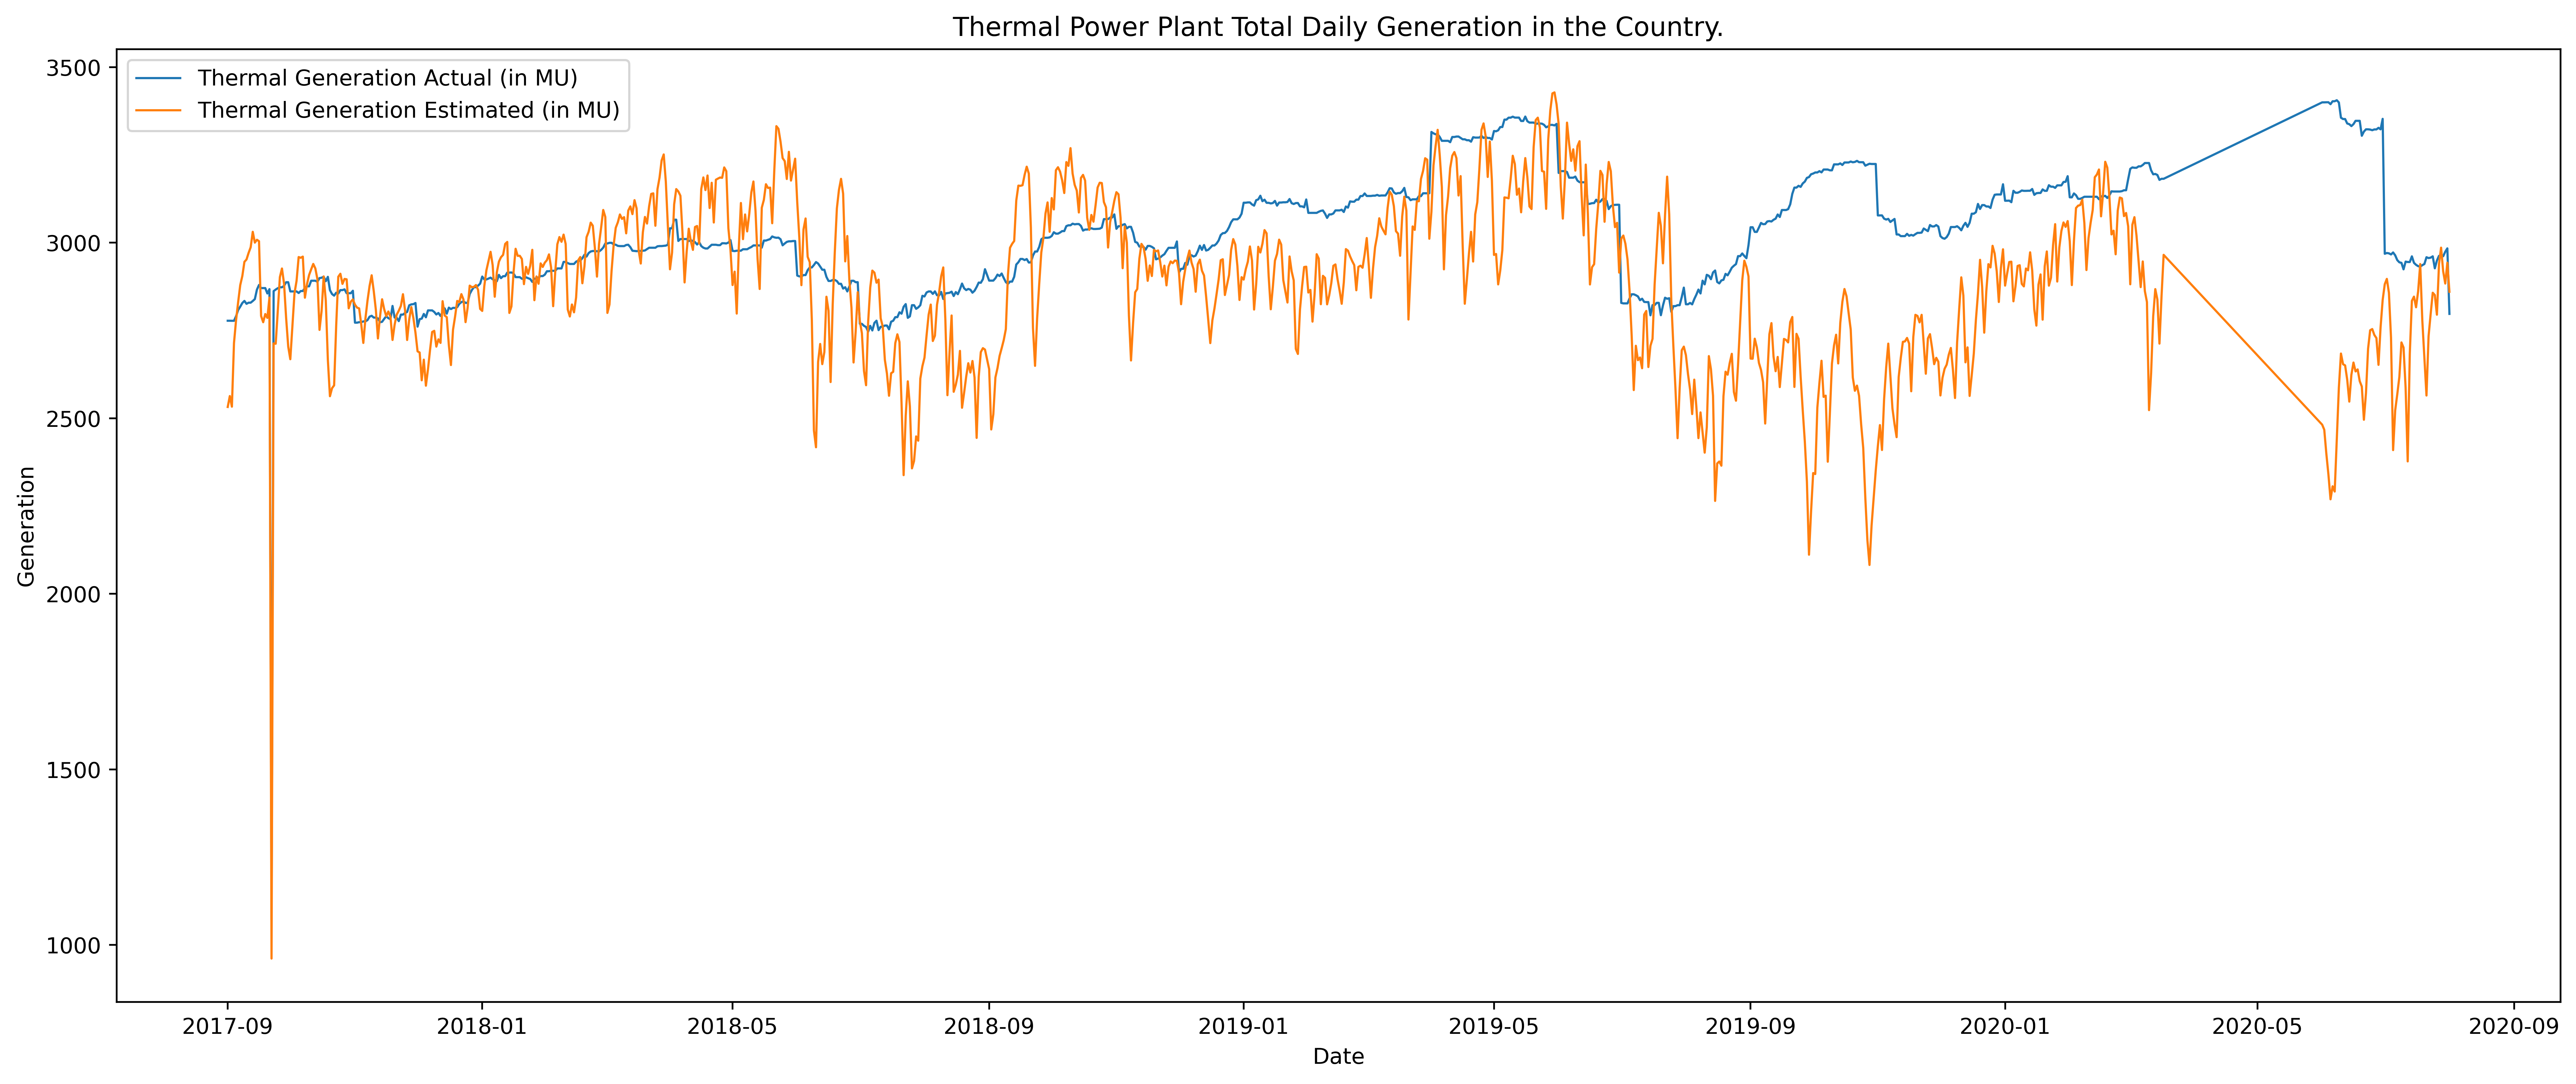

Nuclear Power Plant Total Daily Generation in the Country.


<Figure size 432x288 with 0 Axes>

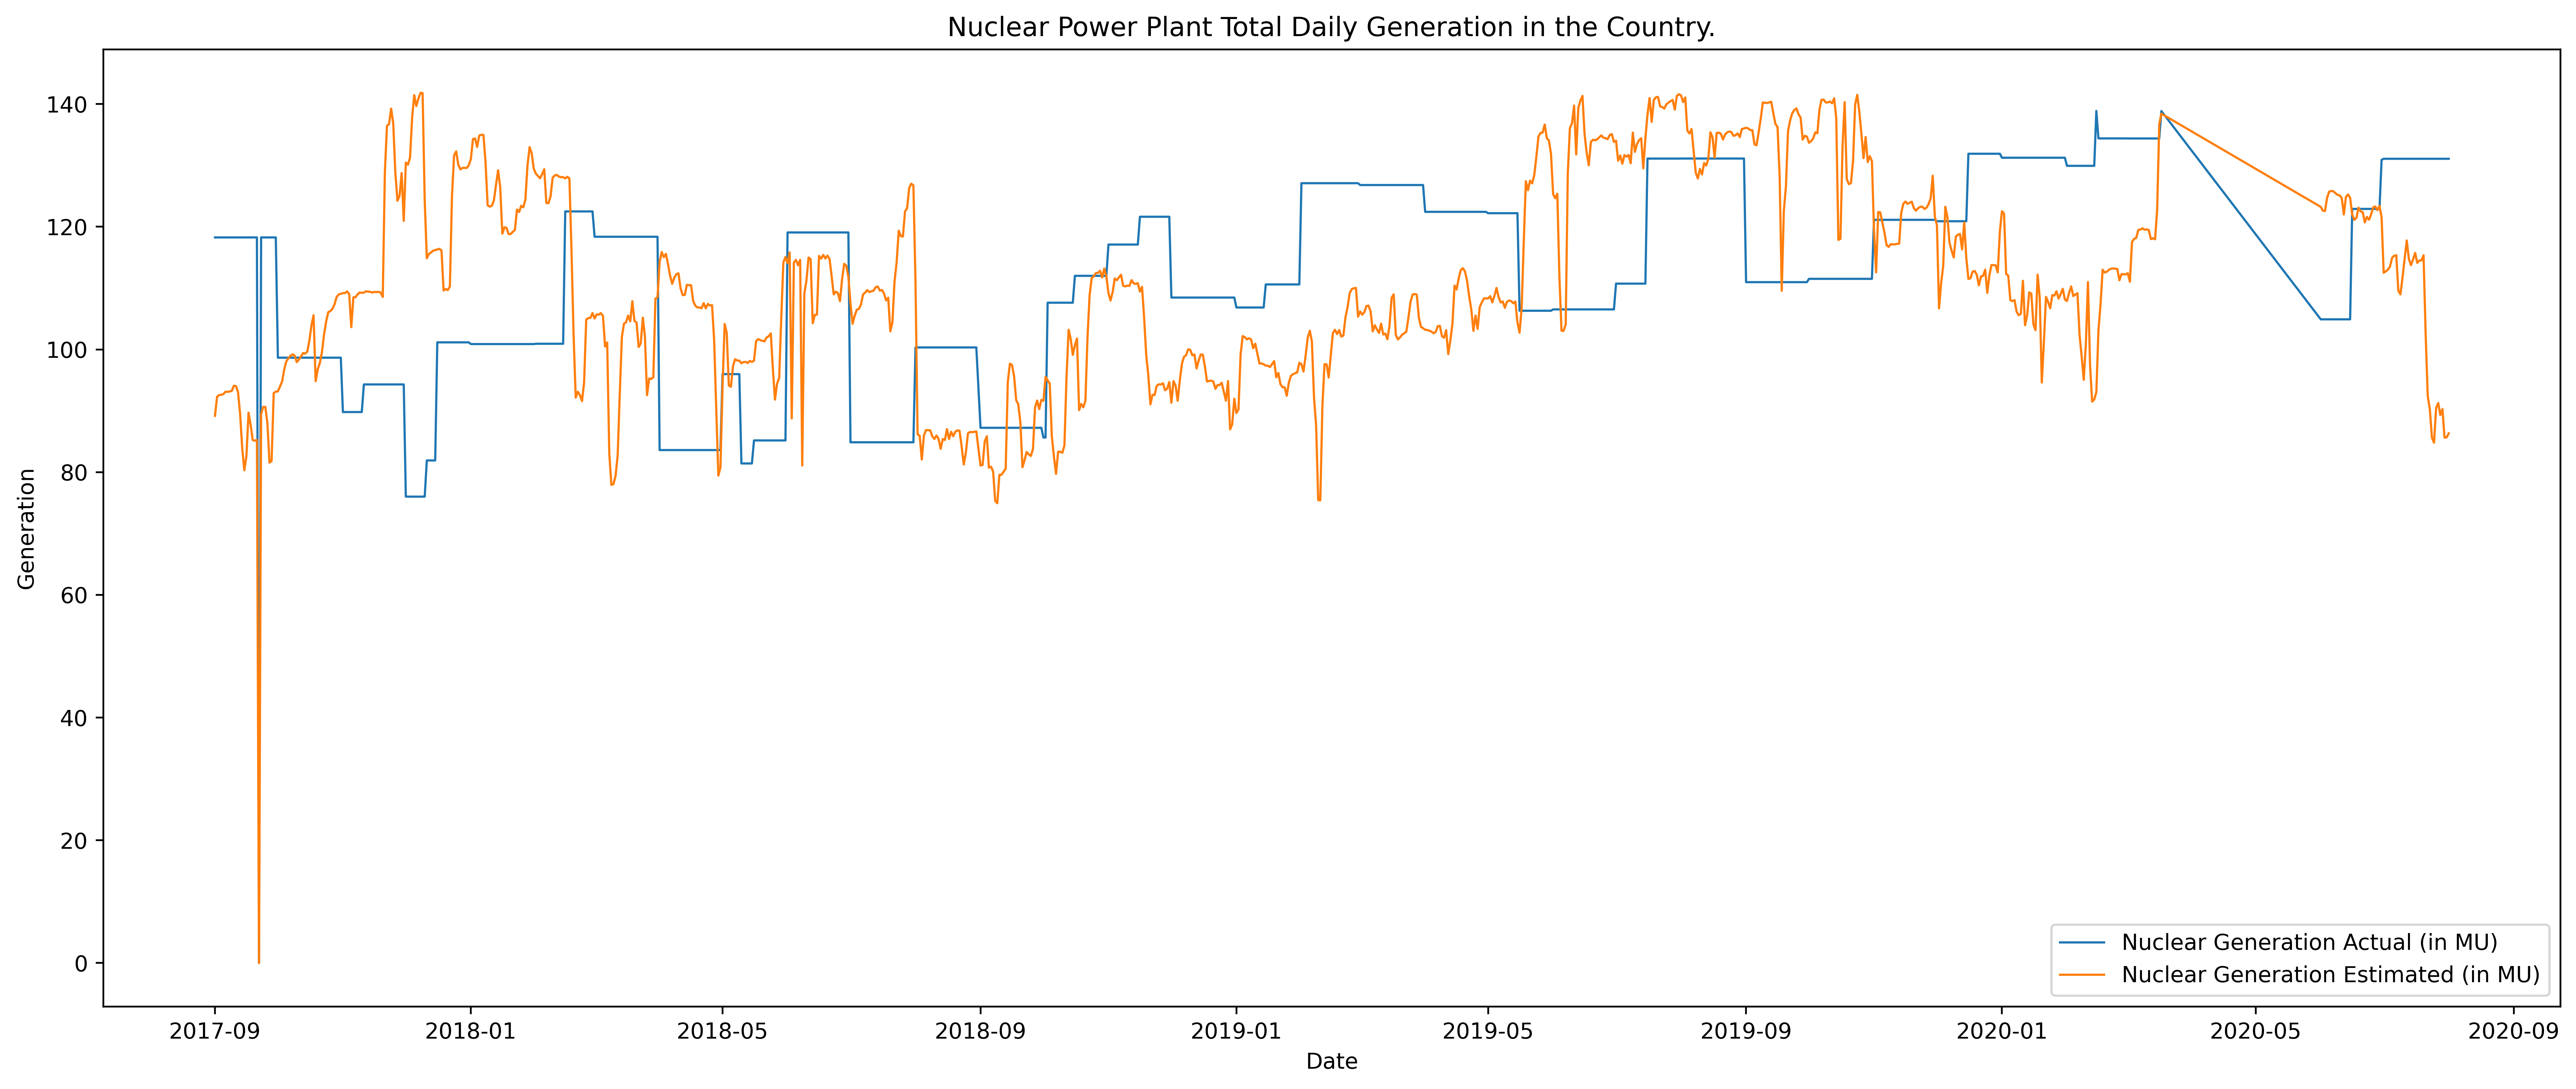

Hydro Power Plant Total Daily Generation in the Country.


<Figure size 432x288 with 0 Axes>

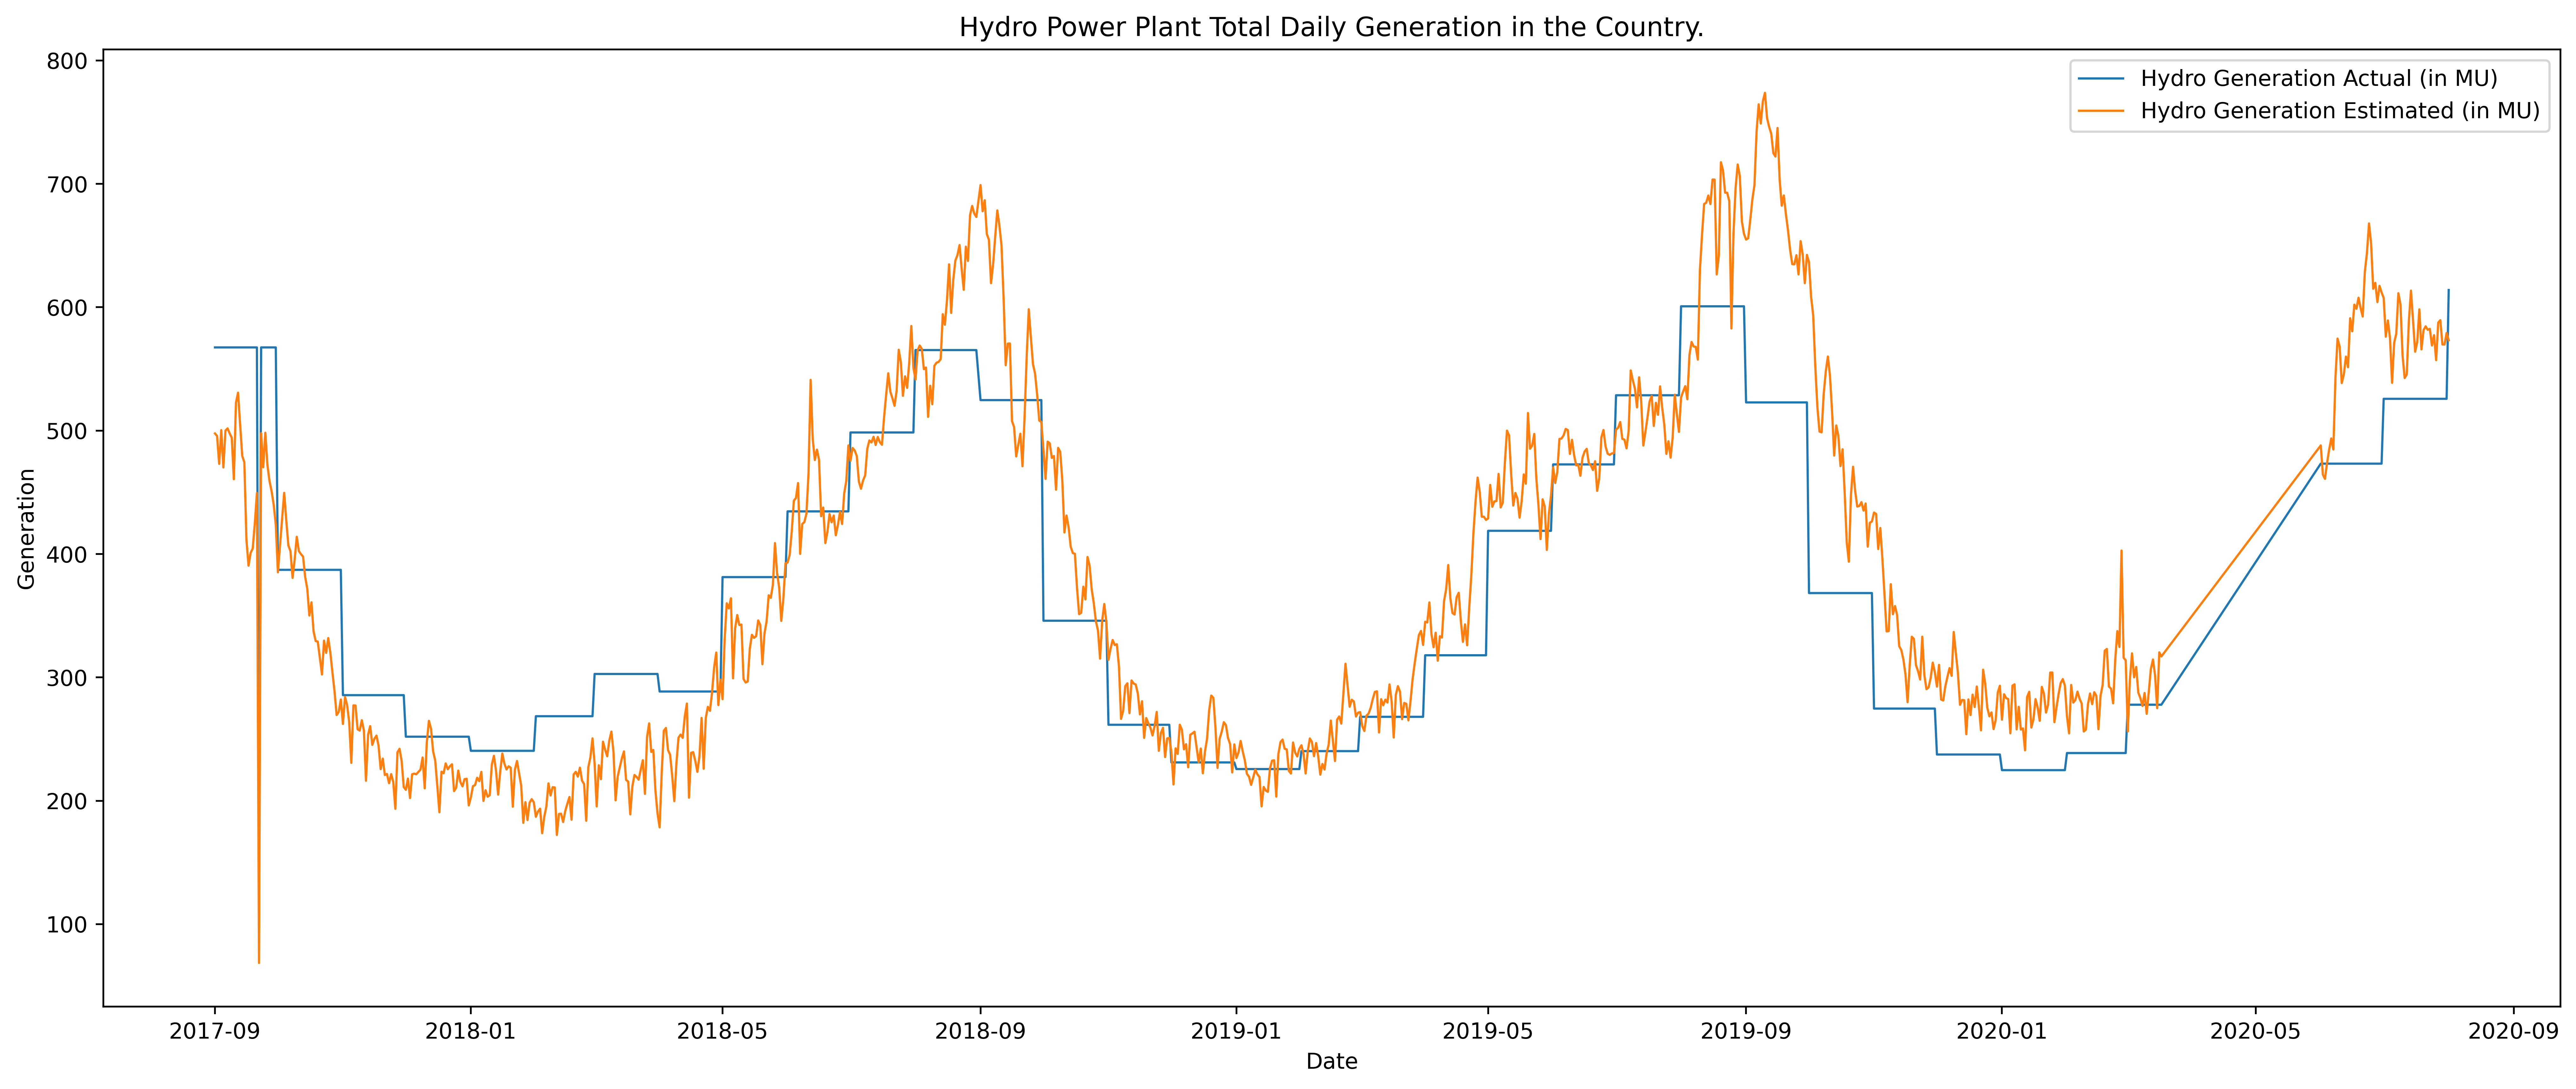

<Figure size 432x288 with 0 Axes>

In [123]:
for i in range(3):
    print(sectors[i]+" Power Plant Total Daily Generation in the Country.")
    plt.figure(figsize=(20,8),dpi = 500)
    plt.plot(date[numeric[0+2*i]], label= numeric[0+2*i], linewidth=1)
    plt.plot(date[numeric[1+2*i]], label= numeric[1+2*i],linewidth=1)
    plt.title(sectors[i]+" Power Plant Total Daily Generation in the Country.")
    plt.xlabel("Date")
    plt.ylabel("Generation")
    plt.legend()
    plt.show()
    plt.savefig("Images/"+sectors[i]+" Power Plant Total Daily Generation in the Country.png",transparent=True,dpi = 250)

India's significant energy production is of the order:  
    1. Thermal  
    2. Hydroelectric  
    3. Nuclear  

1. The relative stability of the power production seen in Thermal plants is a significant advantage currently unclaimable by our renewable sector.
2. Hydroelectric Power Generation has been providing power above the estimates during the rainy and winter seasons while underperforming during the summers. 
3. To rely more on Hydroelectric power, predictability is going to be key and such systemic errors have to be corrected. This calls for higher investments in weather and Meteorological Resource allocation by the policy makers.
4. Nuclear power while holding risks of it's own can potentially be the better replacement to thermal plants as the stability metrics seem to be satisfactory. However further research into cleaner ways of nuclear energy generation like thorium needs to be secured before increasing the dependance.
5. Predictability in Nuclear and Thermal power outputs could be due to unforeseen energy demand and last minute power generation spikes in response.

# Machine Learning Stuff
We try to see if Regions have unique Energy Production prints through which they can be identified.
This is a better way to hone into the regionwise implications and power situations.

In this section, various models and their accuracy metrics are compared.

In [124]:
data.head()

index       Date        Region  Thermal Generation Actual (in MU)  \
0      0 2017-09-01      Northern                             624.23   
1      1 2017-09-01       Western                            1106.89   
2      2 2017-09-01      Southern                             576.66   
3      3 2017-09-01       Eastern                             441.02   
4      4 2017-09-01  NorthEastern                              29.11   

   Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  \
0                                484.21                              30.36   
1                               1024.33                              25.17   
2                                578.55                              62.73   
3                                429.39                               0.00   
4                                 15.91                               0.00   

   Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  \
0                                 35.57                           273.27   
1                                  3.81                            72.00   
2                                 49.80                           111.57   
3                                  0.00                            85.94   
4                                  0.00                            24.64   

   Hydro Generation Estimated (in MU)  Year  Month  
0                              320.81  2017      9  
1                               21.53  2017      9  
2                               64.78  2017      9  
3                               69.36  2017      9  
4                               21.21  2017      9

## Predicting the Region given an Estimate.

In [186]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
data['Region Number'] = label_encoder.fit_transform(data['Region'])
y = data['Region Number'].copy()
X = data.drop(['Region Number','Region','Date','index'], axis=1).copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

models = [
    LogisticRegression(),
    SVC(),
    MLPClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier()
]

model_names = [
    "         Logistic Regression",
    "      Support Vector Machine",
    "              Neural Network",
    "               Decision Tree",
    "         AdaBoost Classifier",
    "          Bagging Classifier",
    "Gradient Boosting Classifier",
    "    Random Forest Classifier"
]
results = []

for model in models:
    model.fit(X_train, y_train)
    results.append(model.score(X_test, y_test))

In [188]:
scores = pd.DataFrame(model_names,columns=['Model'])
scores["R2"] = results
scores.to_csv('Spreadsheets/Classification Scores.csv',index=False)
from IPython.display import HTML
HTML(scores.to_html(index=False))

The high R squared scores imply there being huge correlations between the power outputs and region.
More importantly, the lack of confusion due to similarity can imply that a common policy for all approach can get limiting.
Decision Tree Classifiers, Gradient Boosting Classifiers and the humble Logistic Regression models have been most impressive.

# Make Estimates for Regions

Given a Region, investigate the likely confidence interval for the actual data using the current existent data.
This is to find out the likely interval of Regionwise power production.

This data is hugely helpful while making decisions including a risk of power sufficiency.  
This can also help scientists and engineers focus better on the high risk scenarios showing poor outputs.

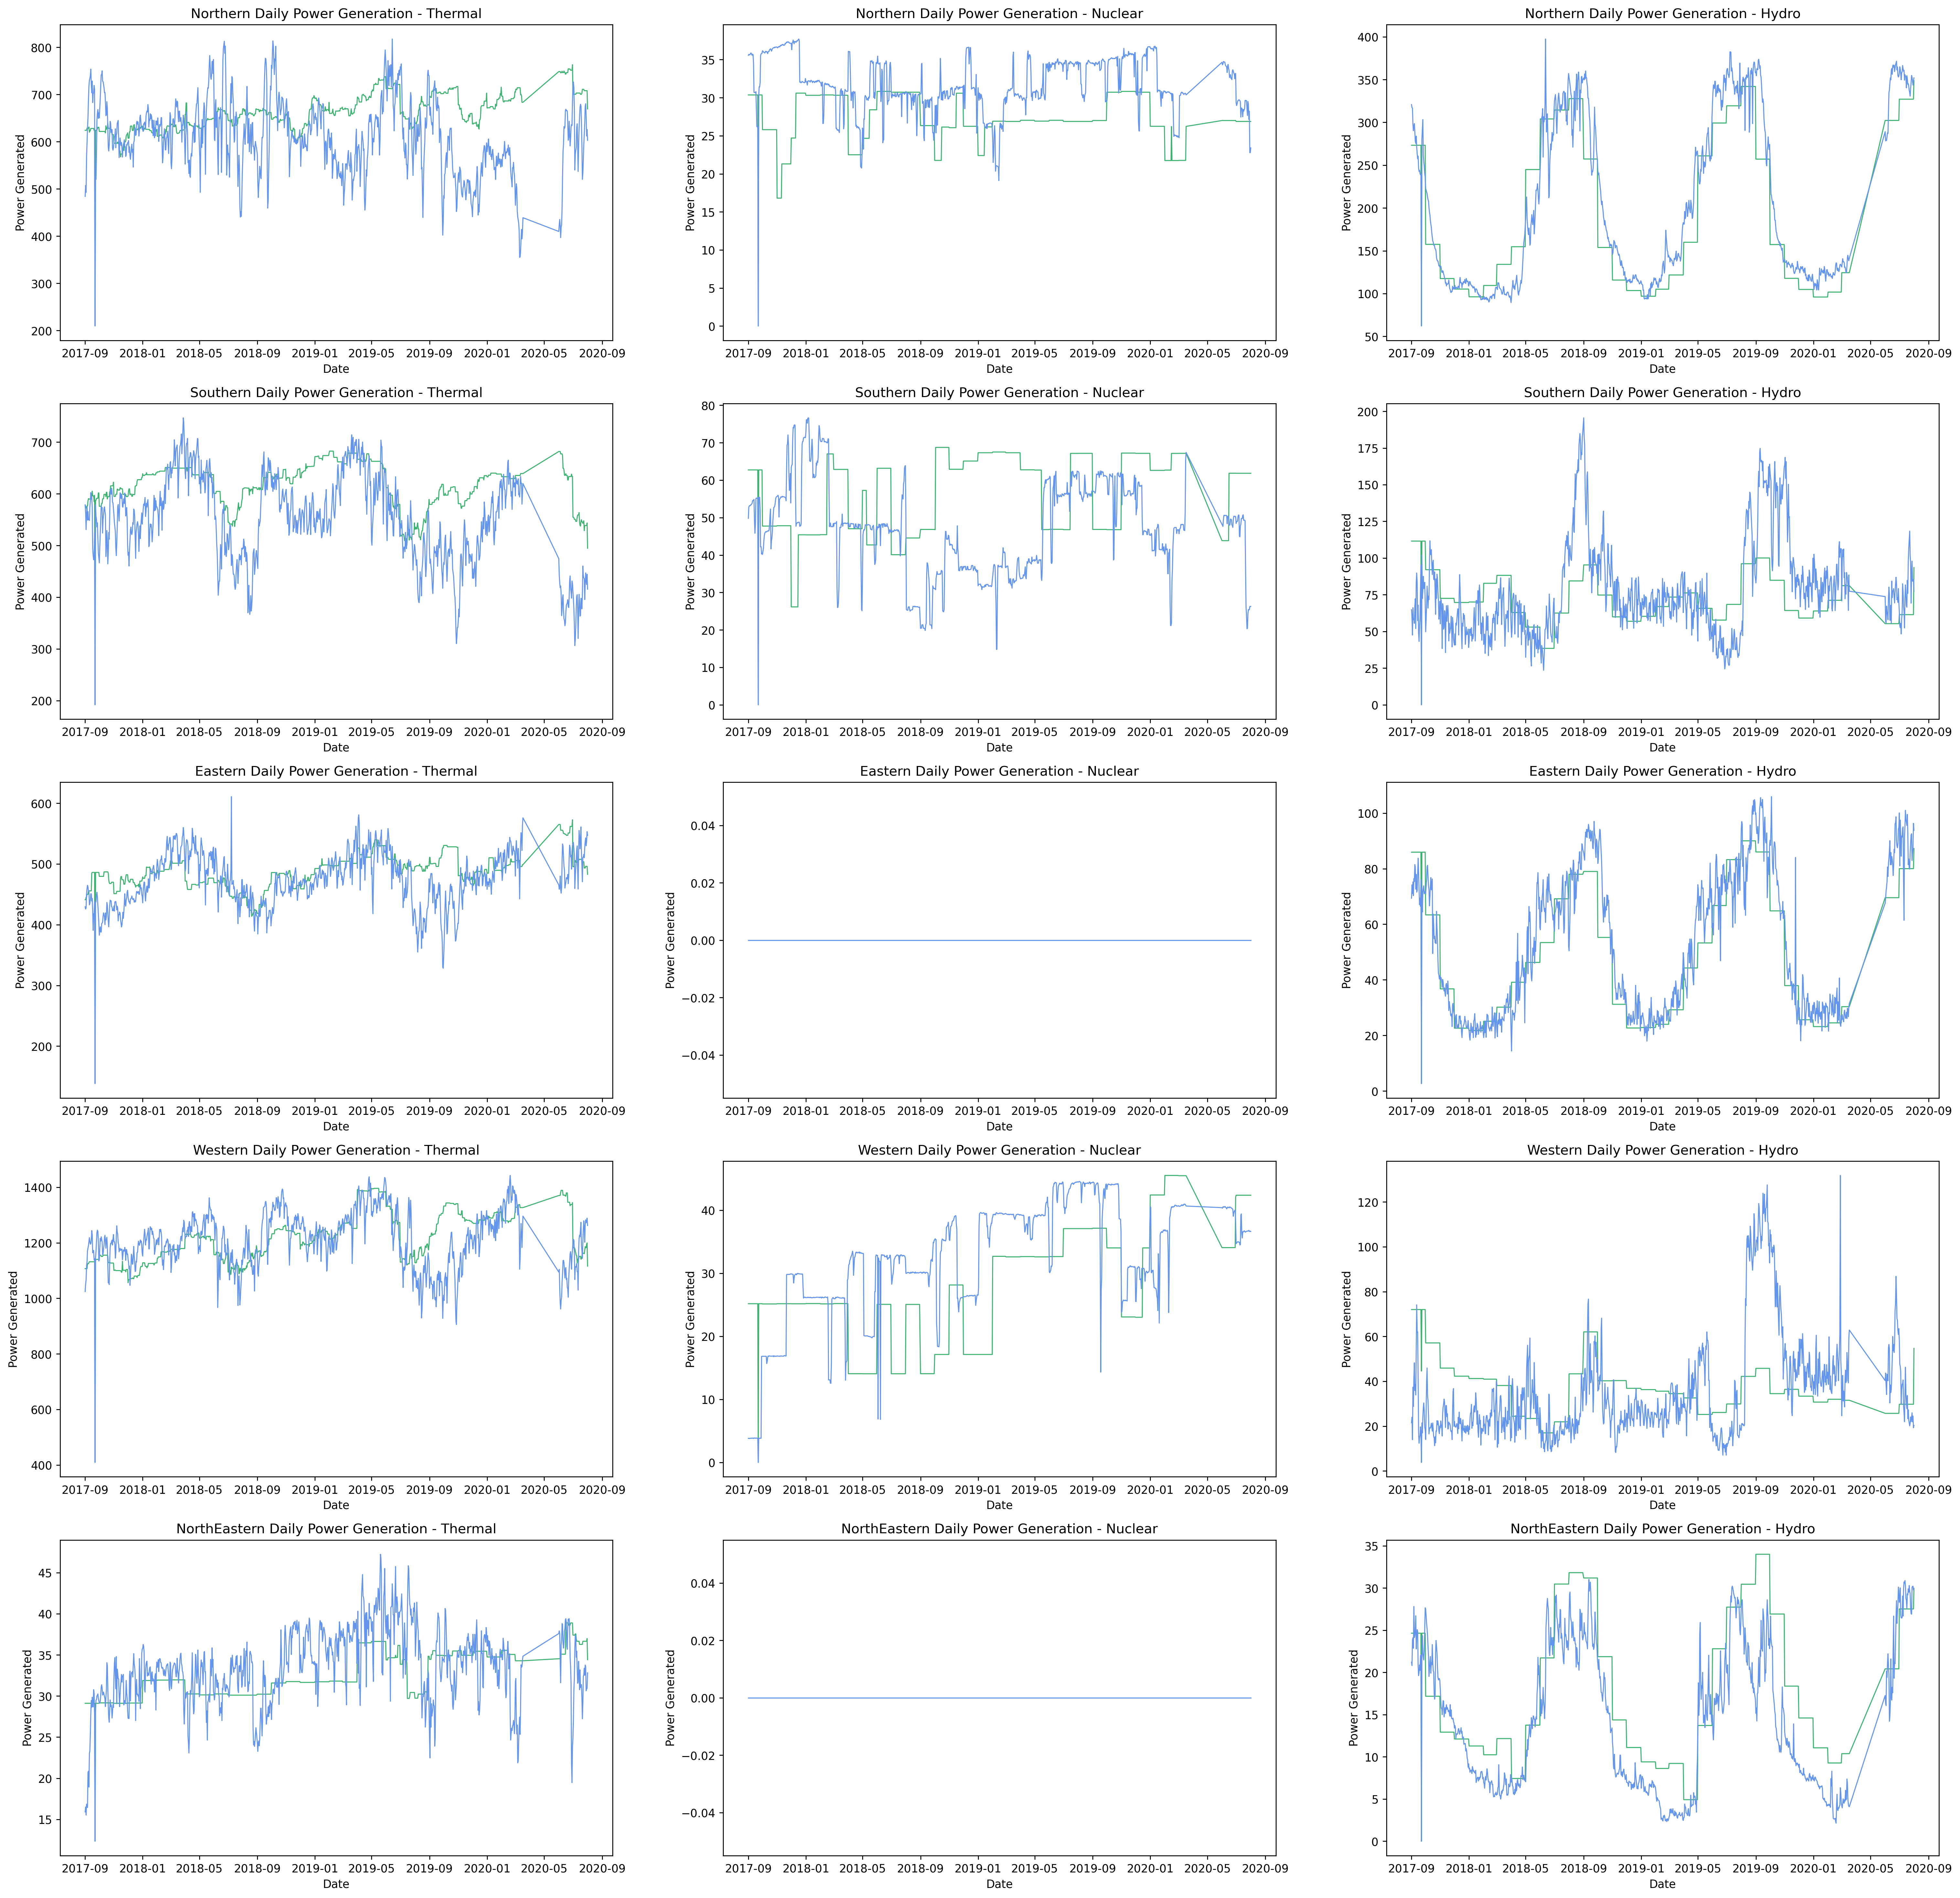

In [128]:
region_name = ['Northern','Southern','Eastern','Western','NorthEastern']
fig,axs =  plt.subplots(5, 3,figsize=(30, 30),dpi = 250)
filepath = 'Spreadsheets/Regionwise'

for i in range(5):
    data[data['Region']==region_name[i]].to_csv(filepath+'/'+region_name[i]+'.csv')
    for j in range(3):
        axs[i,j].plot(data[data['Region']==region_name[i]]['Date'],data[data['Region']==region_name[i]].iloc[:,3+2*j],label = "Actual",color='mediumseagreen',linewidth=0.9)
        axs[i,j].plot(data[data['Region']==region_name[i]]['Date'],data[data['Region']==region_name[i]].iloc[:,4+2*j],label="Estimate",color='cornflowerblue',linewidth=0.9)
        axs[i,j].set_title(region_name[i]+" Daily Power Generation - "+sectors[j])
        axs[i,j].set_xlabel("Date")
        axs[i,j].set_ylabel("Power Generated")
plt.show()
fig.savefig('Images/Regionwise Sectorwise Power Generation.png', transparent=True, dpi = 250)

## The above plot shows us the nature of Power production sector and regionwise

Regionwise speaking,  
1. The nature of periodicity in Hydro electric generation is due to varying climate patterns across India.
2. Investments in Nuclear energy is important to the Northeastern and Eastern regions.
3. As the country's policy makers seek to reduce dependance on thermal power to favoour cleaner energy sources, the regions where it actually is in effect can be seen.

## Statistical Work on Energy production data.
We find the mean and standard deviations of monthwise power productin to understand two key features.  
Mean Power Production gives us the nominal power production capacity per month.
Standard Deviations are helpful to studying the variance of the power production process and invites scientific research into regulating this performance.

In [129]:
Averages = data.groupby(['Year','Month'])[numeric].transform('mean')
STDs = data.groupby(['Year','Month'])[numeric].transform('std')
stat = data.groupby(['Year','Month'])[numeric].agg(['mean','std'])
stat.to_csv('Spreadsheets/Statistical Monthwise.csv')
stat

Thermal Generation Actual (in MU)              \
                                        mean         std   
Year Month                                                 
2017 9                            556.689533  353.756149   
     10                           574.413267  357.248073   
     11                           558.119600  343.795734   
     12                           563.781226  338.618591   
2018 1                            580.341419  350.421204   
     2                            589.812000  362.677463   
     3                            597.649871  366.792918   
     4                            601.214200  386.394280   
     5                            599.180452  382.366071   
     6                            580.553067  361.172646   
     7                            556.899097  347.229019   
     8                            572.977267  358.914978   
     9                            588.044933  371.349632   
     10                           609.183290  390.604581   
     11                           600.150467  388.436886   
     12                           599.599419  375.735960   
2019 1                            622.910194  388.464948   
     2                            619.716714  386.590887   
     3                            627.390129  395.702632   
     4                            659.704133  435.151576   
     5                            668.259871  435.387700   
     6                            629.491000  408.178359   
     7                            566.251355  356.356143   
     8                            580.269613  365.152892   
     9                            619.977467  395.243282   
     10                           643.840645  419.563209   
     11                           608.530400  404.352938   
     12                           615.294452  399.995864   
2020 1                            629.815613  407.529553   
     2                            627.388207  401.344009   
     3                            641.453412  418.545153   
     6                            670.768333  426.298289   
     7                            590.634452  363.952036   
     8                            559.482000  389.734708   

           Thermal Generation Estimated (in MU)              \
                                           mean         std   
Year Month                                                    
2017 9                               553.512933  374.890787   
     10                              567.069133  376.347660   
     11                              559.902533  372.136710   
     12                              552.699548  360.709642   
2018 1                               584.318968  380.806514   
     2                               589.931357  371.396502   
     3                               612.964065  370.561154   
     4                               617.488000  392.877079   
     5                               623.086323  401.033173   
     6                               573.065533  375.755331   
     7                               530.714516  346.226015   
     8                               538.342000  368.041186   
     9                               581.196800  396.710484   
     10                              628.114903  426.085174   
     11                              588.149867  395.743045   
     12                              579.462516  382.798702   
2019 1                               582.022968  378.331128   
     2                               580.311071  380.234500   
     3                               610.298645  402.687595   
     4                               629.440467  426.355372   
     5                               636.524258  424.323829   
     6                               627.923000  409.065496   
     7                               563.635935  370.340412   
     8                               519.298839  340.710444   
     9                               523.564667  330.685362   
     10                   

## Confidence Interval Plot
As we know $\mu$ and $\sigma$, we can find a $2\sigma$ band where likely power production can be expected.   
The thickness of the band highlights the variability of the daily production capabilities. 

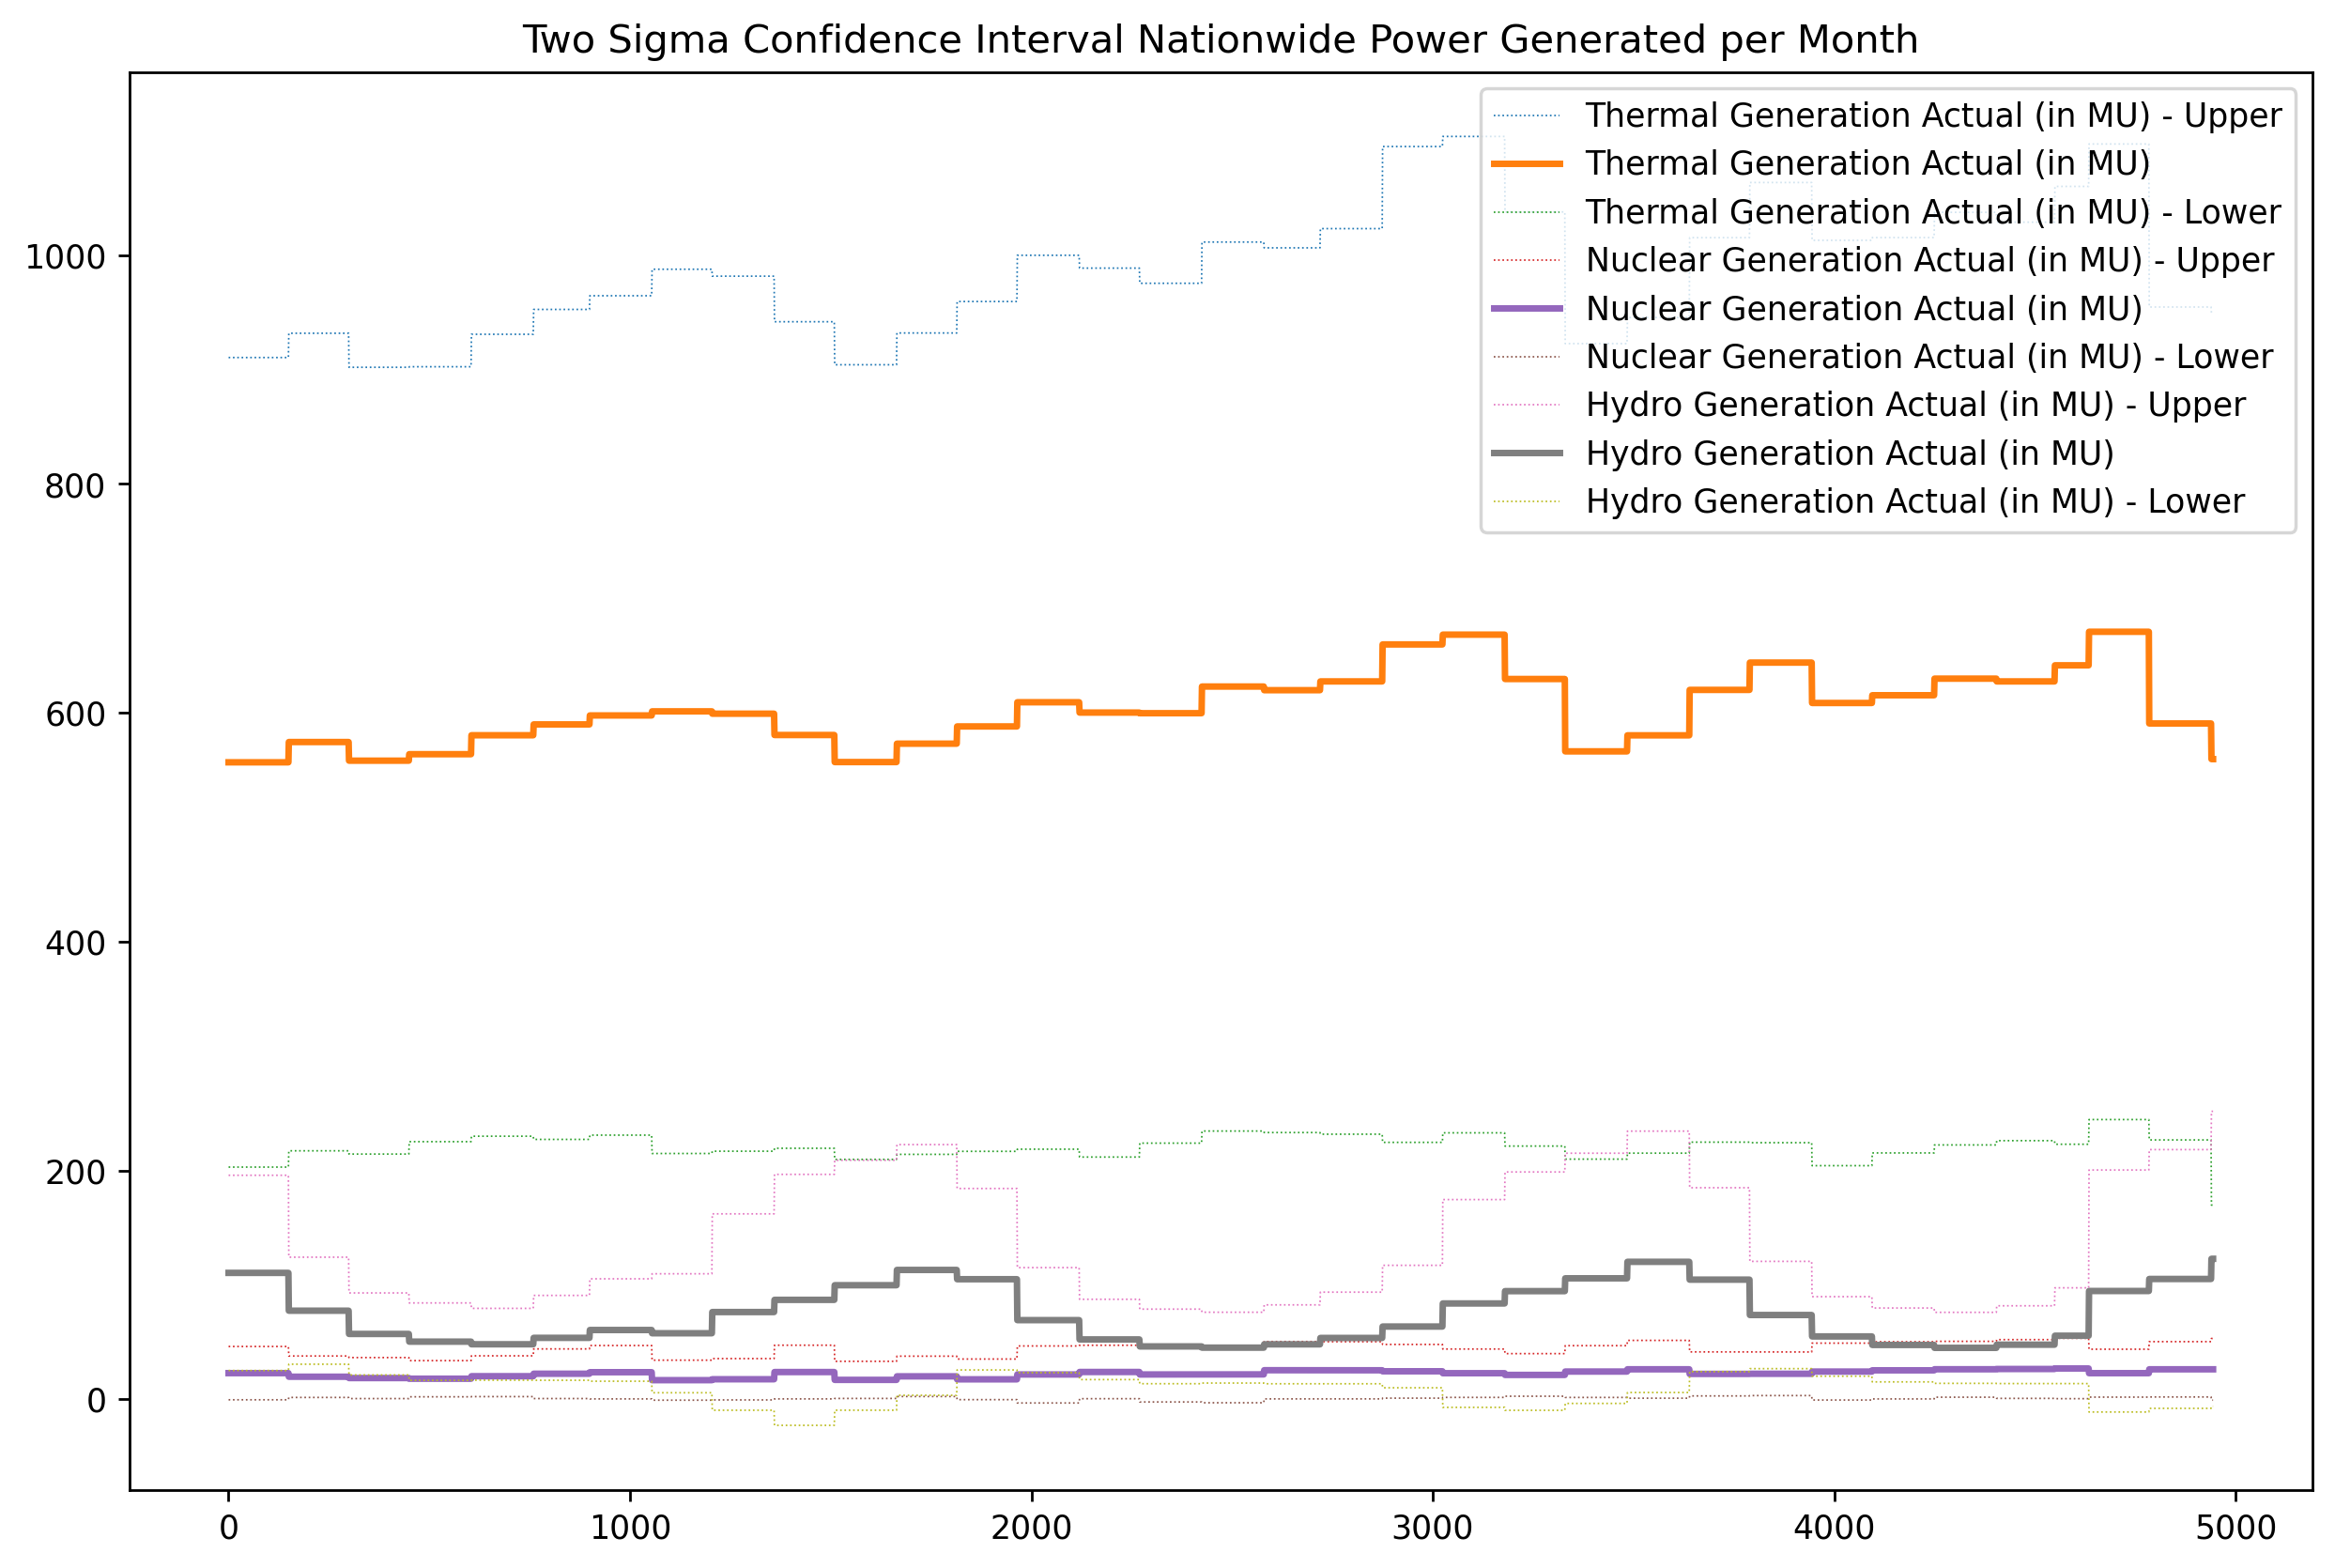

In [130]:
fig = plt.figure(figsize=(12,8),dpi = 250)
T = [numeric[i] for i in [0,2,4]]
for i in T:
    plt.plot(STDs[i]+Averages[i],linewidth = 0.5,label=i+' - Upper',linestyle='dotted')
    plt.plot(Averages[i],linewidth = 2,label=i)
    plt.plot(Averages[i]-STDs[i],linewidth = 0.5,label=i+' - Lower',linestyle='dotted')
plt.title("Two Sigma Confidence Interval Nationwide Power Generated per Month")
plt.legend()
plt.show()
fig.savefig('Images/Two Sigma Confidence Interval Nationwide Power Generated per Month.png', transparent=True, dpi = 250)

# Conclusion

Analysis into our Industries' performance gives us not only insights into the industries themselves but also hints.  
Hints to policy makers and consumers alike over the current state of the Industrial Infrastructure that we have learnt to treat as blackboxes only concerning themselves with the noticeable results.  

As far as our Energy Industries are concerned,
1. More investments in Renewable Sector is required.
2. To facilitate worthy investments, much more engineering has to be performed in our Renewable Sector.
3. The Thermal power plants should correspondingly be eased out without causing labour and consumer problems.

# Resources
<a> https://www.kaggle.com/navinmundhra/daily-power-generation-in-india-20172020 </a>  
<a> https://npp.gov.in/dashBoard/cp-map-dashboard </a>  
<a> https://powermin.gov.in/en/content/power-sector-glance-all-india </a>  